# OKR analysis for S3_2022
---
* Author: Yue Zhang (AG Arrenberg)
* date: 20/06/2022

In [15]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Exp1 import OkrProcessor
%matplotlib inline

## (Optional)  Slow phase and saccade extraction from raw data

In [16]:
working_dir = "C:\\Users\\yzhang\\Desktop\\"
okr_rec_fn = working_dir+"F1_R3_Stim_Spon.txt"
okr_processor = OkrProcessor(okr_rec_fn,exclude_outlier_thre=-40)

* The plot below shows a segment of the left and right eye position traces
* To compute the slow phase eye movement speed and detect the number and the direction of fast eye movement (saccade), **we need to develop an algorithm to detect and separate saccade from slow phase traces**

Text(0, 0.5, 'Eye position (deg)')

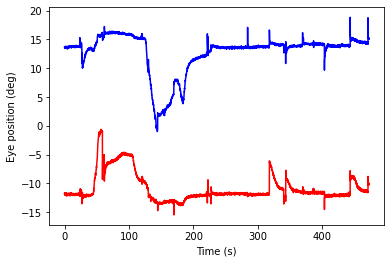

In [17]:
plt.clf()
okr_processor.le_pos.plot(color='r') # plot left eye position traces in red
okr_processor.re_pos.plot(color='b') # plot left eye position traces in blue
# plt.xlim([2030,2130])
plt.xlabel('Time (s)')
plt.ylabel('Eye position (deg)')

* You can either write your own algorithm or use the provided function to detect saccade
* Please use the following template for writing your own saccade detection algorithm

In [18]:
left_eye_pos = okr_processor.le_pos.to_numpy()
right_eye_pos = okr_processor.re_pos.to_numpy()
rec_time = okr_processor.re_pos.index.to_numpy()

In [19]:
def detect_saccade(left_eye_pos,right_eye_pos):
    # write your funciton here
    processed = {
              "le_saccade":le_saccade,
              "re_saccade":re_saccade,
              "le_slowphase":le_slowphase,
              "re_slowphase":re_slowphase,
             }
    return processed

* If you choose to use the provided function, just run the line below

In [20]:
slope_thre = 120/60 # any eye movment faster than 120 degree/second (sampling rate = 60Hz) will be classified as a saccade
movWinSize = 5 # smoothing parameter, defines the smoothing time window (5 frames = 83 ms)
processed = okr_processor.detect_saccade(slope_thre,movWinSize)

### Visualizing the saccade detection result and the slow phase only eye traces

Text(0, 0.5, 'Eye position (deg)')

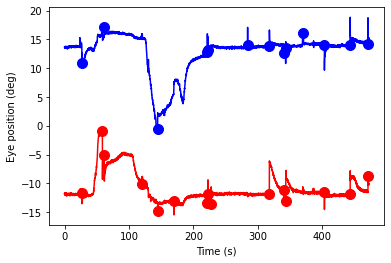

In [21]:
saccade_L = np.where(processed['le_saccade'])[0] # position index for saccades detected in the left eye traces
saccade_R = np.where(processed['re_saccade'])[0] # position index for saccades detected in the right eye traces
plt.clf()
plt.plot(rec_time,left_eye_pos,color='r')
plt.plot(rec_time,right_eye_pos,color='b')
plt.scatter(rec_time[saccade_L],left_eye_pos[saccade_L],s=100,color = 'r',marker = 'o')
plt.scatter(rec_time[saccade_R],right_eye_pos[saccade_R],s=100,color = 'b',marker = 'o')
# plt.xlim([2030,2130])
plt.xlabel('Time (s)')
plt.ylabel('Eye position (deg)')

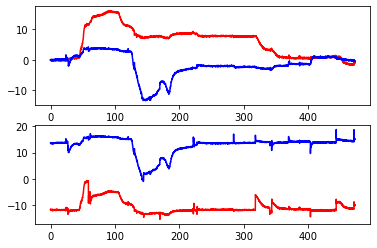

In [22]:
saccade_free_left_eye_pos = processed['le_slowphase'] # slow phase only left eye trace
saccade_free_right_eye_pos = processed['re_slowphase'] # slow phase only right eye trace
plt.clf()
plt.subplot(211)
plt.plot(rec_time,saccade_free_left_eye_pos,color='r')
plt.plot(rec_time,saccade_free_right_eye_pos,color='b')
# plt.xlim([2000,3000])
plt.subplot(212)
plt.plot(rec_time,left_eye_pos,color='r')
plt.plot(rec_time,right_eye_pos,color='b')
# plt.xlim([2000,3000])

## (Optional) Compute eye movement statistics for each stimulus phase

As shown in the plot below, you will need to segment the eye traces by stimulus phases to **count the number of saccade** and **compute the eye movement speed** separately. Again you can write your own function to do this or just use the function we provided

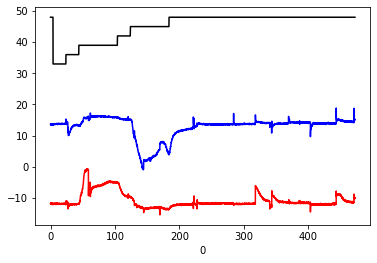

In [23]:
plt.clf()
(okr_processor.phase_idx_array*3+30).plot(color='k') # Stimulus phase index
plt.plot(rec_time,left_eye_pos,color='r')
plt.plot(rec_time,right_eye_pos,color='b')
# plt.xlim([2000,3000])

In [24]:
def compute_okr_statistics(processed_data,phase_idx_array):
    # write the function for computing okr statistic by stimulus phases
    return okr_statistics    

In [25]:
okr_statistics = okr_processor.compute_okr_statistics(processed_data=processed)
okr_statistics

,phase,repeat,le_okr_speed,le_pos_saccade_num,le_neg_saccade_num,re_okr_speed,re_pos_saccade_num,re_neg_saccade_num
0,1.0,0,-0.017604,0,0,0.051813,0,0
0,2.0,0,0.068526,1,0,-0.017894,1,0
0,3.0,0,0.249683,2,0,0.03886,1,0
0,4.0,0,-0.244681,0,1,-0.036687,0,0
0,5.0,0,-0.059864,0,2,-0.233721,0,1
0,6.0,0,0.040525,3,3,-0.061568,2,1


## Compute OKR gain from the okr statistics
* Hint: $\text{OKR gain} = \frac{\text{eye_speed}}{\text{stimulus_speed}}$
* If you have multiple repeats for each stimulus phase, you may want to compute the averaged okr gain for each phase as well.

In [26]:
stimulus_speed = None # create an numpy array to store the grating speed of all stimulus phases
okr_gain = None # compute the okr gain here

## Compute number of saccade and directionality of saccade
Hint: $\text{Directionality} = abs({\frac{\text{left saccade}-\text{right saccade}}{\text{left saccade}+\text{right saccade}}})$

In [27]:
n_left_saccade = None # create an numpy array to store the number of left saccade for all stimulus phases
n_right_saccade = None # create an numpy array to store the number of right saccade for all stimulus phases
directionality = None

## Compare the OKR statistics across different development stages
* An easy way to do this is to **manually type down the OKR gain, number of saccade and saccade directionality of a selected stimulus phase for each *fish* and *dpf*** into lists or numpy arrays, or directly in excel.
* You may want to pick the stimulus phase which is the **best in triggering OKR** for this step

* If you are doing it in python, use `scipy.stats.ttest_ind` for [two-tailed t test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) and `scipy.stats.f_oneway` for [one way ANOVA](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html). Click the links for detailed documentation

In [28]:
from scipy.stats import ttest_ind, f_oneway
# write your script below